<a href="https://colab.research.google.com/github/shyamsgadekar/Email_Campaign_Effectiveness_Prediction_shyam_gadekar/blob/main/Email_Campaign_Effectiveness_Prediction_shyam_gadekar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Email Campaign Effectiveness Prediction**



##### **Project Type**    - Supervised ML - Classification Capstone Project
##### **Contribution**    - Individual


# **Project Summary -**

This project aimed to create a machine learning model to characterize emails and track their status, specifically whether they were ignored, read, or acknowledged by the reader. The dataset provided contained information such as email type, subject hotness score, email source type, customer location, email campaign type, total past communications, time email sent category, word count, total links, total images, and email status.

The project was carried out in Python, using popular machine learning libraries such as pandas, numpy, scikit-learn, and seaborn. The dataset was first preprocessed by handling missing values, encoding categorical variables, and scaling numerical features. Then, an exploratory data analysis was performed to gain insights into the data and understand the relationships between variables.

Next, a Naive Bayes classifier was trained on the preprocessed data to predict the email status. The performance of the model was evaluated using metrics such as accuracy, precision, recall, and F1 score. The results showed that the model achieved a high accuracy of around 80%.

Finally, the insights gained from the exploratory data analysis were summarized in visualizations, providing actionable insights for small to medium business owners looking to improve their email marketing strategies. Overall, the project demonstrated the effectiveness of machine learning in characterizing and tracking emails, and the potential of such models in improving business outcomes.



# **GitHub Link -**

https://github.com/shyamsgadekar/Email_Campaign_Effectiveness_Prediction_shyam_gadekar

# **Problem Statement**


Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader. Data columns are self-explanatory.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# data reding and manipulation
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy.stats import *
from scipy import stats
import math

#for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

#modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, roc_auc_score
# from sklearn.metrics import roc_auc_ovr
# from sklearn.metrics import roc_auc_ovo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

!pip install shap
import shap

# The following lines adjust the granularity of reporting. 
pd.options.display.float_format = "{:.2f}".format

#ignore warning
import warnings
warnings.filterwarnings('ignore')

#update scikit learn for some features like roc_auc_ovr
# !pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 11.6 MB/s eta 0:00:00


### Dataset Loading

In [2]:
#mouting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
dfe =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/3.3_ML_CLASSIFICATION_SHYAM_GADEKAR/data_email_campaign.csv')

### Dataset First View

In [4]:
# Dataset First Look
dfe.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.20,2,E,2,33.00,1,440,8.00,0.00,0
1,EMA00081000045360,2,2.10,1,NaN,2,15.00,2,504,5.00,0.00,0
2,EMA00081000066290,2,0.10,1,B,3,36.00,2,962,5.00,0.00,1
3,EMA00081000076560,1,3.00,2,E,2,25.00,2,610,16.00,0.00,0
4,EMA00081000109720,1,0.00,2,C,3,18.00,2,947,4.00,0.00,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f'Total rows(observation): {dfe.shape[0]} and columns(feature): {dfe.shape[1]}')

Total rows(observation): 68353 and columns(feature): 12


### Dataset Information

In [6]:
# Dataset Info
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
dfe.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
68348    False
68349    False
68350    False
68351    False
68352    False
Length: 68353, dtype: bool

there is bo duplicate value

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
dfe.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

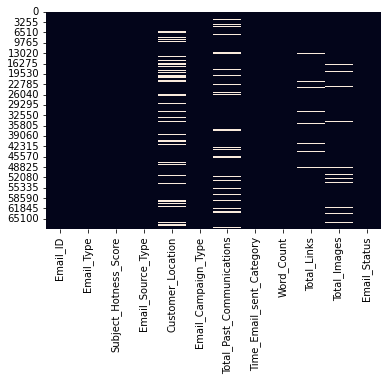

In [9]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dfe.isnull(), cbar=False);

### What did you know about your dataset?

* Dataset has total of 68353 rows(observation) and 12 columns(features).
* Dataset is a mixture of integer, float and object data type.
* Dataset has no duplicate which means data is free from bias as duplicates can cause problems in downstream analyses, such as biasing results or making it difficult to accurately summarize the data.
* Features like customer location, total past communication , total link , total images has null values. 

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
features = dfe.columns.to_list()
features

['Email_ID',
 'Email_Type',
 'Subject_Hotness_Score',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Total_Past_Communications',
 'Time_Email_sent_Category',
 'Word_Count',
 'Total_Links',
 'Total_Images',
 'Email_Status']

In [11]:
# Dataset Describe
dfe.describe().T

,count,mean,std,min,25%,50%,75%,max
Email_Type,68353.00,1.29,0.45,1.00,1.00,1.00,2.00,2.00
Subject_Hotness_Score,68353.00,1.10,1.00,0.00,0.20,0.80,1.80,5.00
Email_Source_Type,68353.00,1.46,0.50,1.00,1.00,1.00,2.00,2.00
Email_Campaign_Type,68353.00,2.27,0.47,1.00,2.00,2.00,3.00,3.00
Total_Past_Communications,61528.00,28.93,12.54,0.00,20.00,28.00,38.00,67.00
Time_Email_sent_Category,68353.00,2.00,0.63,1.00,2.00,2.00,2.00,3.00
Word_Count,68353.00,699.93,271.72,40.00,521.00,694.00,880.00,1316.00
Total_Links,66152.00,10.43,6.38,1.00,6.00,9.00,14.00,49.00
Total_Images,66676.00,3.55,5.60,0.00,0.00,0.00,5.00,45.00
Email_Status,68353.00,0.23,0.50,0.00,0.00,0.00,0.00,2.00


### Variables Description 

* **Email_Id** - Email id of customer
* **Email_Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates and notices like emails regarding business
* **Subject_Hotness_Score** - It is the email's subject's score on the basis of how good and effective the content is
* **Email_Source_Type** - It represents the source of the email like sales and marketing or important admin mails related to the product
* **Email_Campaign_Type** - The campaign type of the email.
* **Customer_Location** - Contains demographical data of the customer, the location where the customer resides.
* **Total_Past_Communications** - This columns contains the total previous mails from the same source, the number of communications had.
* **Time_Email_sent_Category** - It has three categories 1,2 and 3, Time of the day when the email was sent, either morning, evening and night time
* **Word_Count** - Total count of word in each email
* **Total_links** - Total number of links in the email
* **Total_Images** - Total Number of images in the email
* **Email_Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for c in features:
  print(f'no of unique values in {c} is {dfe[c].nunique()}.')


no of unique values in Email_ID is 68353.
no of unique values in Email_Type is 2.
no of unique values in Subject_Hotness_Score is 51.
no of unique values in Email_Source_Type is 2.
no of unique values in Customer_Location is 7.
no of unique values in Email_Campaign_Type is 3.
no of unique values in Total_Past_Communications is 64.
no of unique values in Time_Email_sent_Category is 3.
no of unique values in Word_Count is 151.
no of unique values in Total_Links is 37.
no of unique values in Total_Images is 45.
no of unique values in Email_Status is 3.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
df=dfe.copy(0)

In [14]:
#Checking Shape of Email Read, acknowledge ,ignored
print("No. of Email Read : -",len(df[df['Email_Status'] == 1]))
print("No. of Email Acknowledged : -",len(df[df['Email_Status'] == 2]))
print("No. of Email Ignored : -",len(df[df['Email_Status'] == 0]))

No. of Email Read : - 11039
No. of Email Acknowledged : - 2373
No. of Email Ignored : - 54941


In [15]:
# Email Status by Email_Type
pd.DataFrame(df.groupby('Email_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Type,Email_Status,Count
0,1,0,39004
1,1,1,8208
2,1,2,1654
3,2,0,15937
4,2,1,2831
5,2,2,719


In [16]:
# Email Status by Email_Source_Type
pd.DataFrame(df.groupby('Email_Source_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Source_Type,Email_Status,Count
0,1,0,29577
1,1,1,6150
2,1,2,1422
3,2,0,25364
4,2,1,4889
5,2,2,951


In [17]:
# Email Status by Customer_Location
pd.DataFrame(df.groupby('Customer_Location')['Email_Status'].value_counts().reset_index(name="Count"))

,Customer_Location,Email_Status,Count
0,A,0,1160
1,A,1,245
2,A,2,49
3,B,0,3502
4,B,1,714
5,B,2,125
6,C,0,4654
7,C,1,890
8,C,2,214
9,D,0,5950


In [18]:
# Email Status by Email_Campaign_Type
pd.DataFrame(df.groupby('Email_Campaign_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Campaign_Type,Email_Status,Count
0,1,1,486
1,1,2,173
2,1,0,77
3,2,0,42115
4,2,1,5446
5,2,2,712
6,3,0,12749
7,3,1,5107
8,3,2,1488


In [19]:
# Email Status by Time_Email_sent_Category
pd.DataFrame(df.groupby('Time_Email_sent_Category')['Email_Status'].value_counts().reset_index(name="Count"))

,Time_Email_sent_Category,Email_Status,Count
0,1,0,10970
1,1,1,2186
2,1,2,480
3,2,0,33062
4,2,1,6631
5,2,2,1436
6,3,0,10909
7,3,1,2222
8,3,2,457


In [20]:
#creating variable to store numerical feature
num_feature = df.select_dtypes(include = 'float').columns.to_list()
num_feature.append('Word_Count')
num_feature

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Total_Links',
 'Total_Images',
 'Word_Count']

In [21]:
#creating variable to store categorial features
cat_feature = [f for f in features if f not in num_feature]
cat_feature  

['Email_ID',
 'Email_Type',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Time_Email_sent_Category',
 'Email_Status']

In [22]:
#finding count, sum, mean and median based on Email Type
df.groupby('Email_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Type                                 1           2
Subject_Hotness_Score     count     48866.00    19487.00
                          sum       60780.70    14098.70
                          mean          1.24        0.72
                          median        1.10        0.30
Total_Past_Communications count     44065.00    17463.00
                          sum     1291275.00   488930.00
                          mean         29.30       28.00
                          median       29.00       28.00
Total_Links               count     47286.00    18866.00
                          sum      524149.00   165785.00
                          mean         11.08        8.79
                          median        9.00        8.00
Total_Images              count     47655.00    19021.00
                          sum      187546.00    49199.00
                          mean          3.94        2.59
                          median        1.00        0.00
Word_Count                count     48866.00    19487.00
                          sum    33549373.00 14293062.00
                          mean        686.56      733.47
                          median      678.00      722.00

In [23]:
#finding count, sum, mean and median based on Email_Source_Type
df.groupby('Email_Source_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Source_Type                          1           2
Subject_Hotness_Score     count     37149.00    31204.00
                          sum       40487.40    34392.00
                          mean          1.09        1.10
                          median        0.80        0.80
Total_Past_Communications count     33353.00    28175.00
                          sum      991852.00   788353.00
                          mean         29.74       27.98
                          median       30.00       27.00
Total_Links               count     35950.00    30202.00
                          sum      362804.00   327130.00
                          mean         10.09       10.83
                          median        9.00        9.00
Total_Images              count     36244.00    30432.00
                          sum      121422.00   115323.00
                          mean          3.35        3.79
                          median        0.00        0.00
Word_Count                count     37149.00    31204.00
                          sum    25554766.00 22287669.00
                          mean        687.90      714.26
                          median      684.00      704.00

In [24]:
#finding count, sum, mean and median based on Customer_Location
df.groupby('Customer_Location')[num_feature].agg(['count','sum','mean','median']).T

Customer_Location                         A          B          C          D  \
Subject_Hotness_Score     count     1454.00    4341.00    5758.00    7406.00   
                          sum       1644.40    4847.90    6351.10    8187.80   
                          mean         1.13       1.12       1.10       1.11   
                          median       0.90       0.90       0.80       0.80   
Total_Past_Communications count     1300.00    3939.00    5183.00    6625.00   
                          sum      36970.00  113462.00  149572.00  190223.00   
                          mean        28.44      28.80      28.86      28.71   
                          median      27.00      28.00      28.00      28.00   
Total_Links               count     1407.00    4205.00    5573.00    7157.00   
                          sum      14587.00   43979.00   58697.00   74548.00   
                          mean        10.37      10.46      10.53      10.42   
                          median       9.00       9.00       9.00       9.00   
Total_Images              count     1416.00    4236.00    5606.00    7244.00   
                          sum       4795.00   15434.00   20202.00   25471.00   
                          mean         3.39       3.64       3.60       3.52   
                          median       0.00       0.00       0.00       0.00   
Word_Count                count     1454.00    4341.00    5758.00    7406.00   
                          sum    1004166.00 3045906.00 4053360.00 5183849.00   
                          mean       690.62     701.66     703.95     699.95   
                          median     694.00     694.00     694.00     694.00   

Customer_Location                         E          F           G  
Subject_Hotness_Score     count    10193.00    4433.00    23173.00  
                          sum      11116.40    4794.40    25240.40  
                          mean         1.09       1.08        1.09  
                          median       0.80       0.80        0.80  
Total_Past_Communications count     9170.00    3980.00    20918.00  
                          sum     267177.00  115036.00   605727.00  
                          mean        29.14      28.90       28.96  
                          median      29.00      28.00       29.00  
Total_Links               count     9872.00    4311.00    22429.00  
                          sum     102092.00   45631.00   233246.00  
                          mean        10.34      10.58       10.40  
                          median       9.00       9.00        9.00  
Total_Images              count     9938.00    4319.00    22614.00  
                          sum      34813.00   15949.00    79875.00  
                          mean         3.50       3.69        3.53  
                          median       0.00       0.00        0.00  
Word_Count                count    10193.00    4433.00    23173.00  
                          sum    7128244.00 3099054.00 16263635.00  
                          mean       699.33     699.09      701.84  
                          median     694.00     694.00      694.00

In [25]:
#finding count, sum, mean and median based on Email_Campaign_Type
df.groupby('Email_Campaign_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Campaign_Type                      1           2           3
Subject_Hotness_Score     count     736.00    48273.00    19344.00
                          sum       111.70    71869.60     2898.10
                          mean        0.15        1.49        0.15
                          median      0.20        1.40        0.10
Total_Past_Communications count     657.00    43475.00    17396.00
                          sum         0.00  1165934.00   614271.00
                          mean        0.00       26.82       35.31
                          median      0.00       26.00       36.00
Total_Links               count     706.00    46727.00    18719.00
                          sum       706.00   499701.00   189527.00
                          mean        1.00       10.69       10.12
                          median      1.00        9.00        9.00
Total_Images              count     722.00    47106.00    18848.00
                          sum         0.00   173880.00    62865.00
                          mean        0.00        3.69        3.34
                          median      0.00        0.00        0.00
Word_Count                count     736.00    48273.00    19344.00
                          sum    482278.00 33300455.00 14059702.00
                          mean      655.27      689.84      726.82
                          median    662.00      684.00      721.00

In [26]:
#finding count, sum, mean and median based on Time_Email_sent_Category
df.groupby('Time_Email_sent_Category')[num_feature].agg(['count','sum','mean','median']).T

Time_Email_sent_Category                  1           2          3
Subject_Hotness_Score     count    13636.00    41129.00   13588.00
                          sum      15187.00    44715.70   14976.70
                          mean         1.11        1.09       1.10
                          median       0.90        0.80       0.80
Total_Past_Communications count    12244.00    37046.00   12238.00
                          sum     353375.00  1074034.00  352796.00
                          mean        28.86       28.99      28.83
                          median      28.00       28.00      28.00
Total_Links               count    13191.00    39798.00   13163.00
                          sum     138427.00   413904.00  137603.00
                          mean        10.49       10.40      10.45
                          median       9.00        9.00       9.00
Total_Images              count    13306.00    40118.00   13252.00
                          sum      47361.00   142188.00   47196.00
                          mean         3.56        3.54       3.56
                          median       0.00        0.00       0.00
Word_Count                count    13636.00    41129.00   13588.00
                          sum    9522852.00 28836283.00 9483300.00
                          mean       698.36      701.12     697.92
                          median     694.00      694.00     694.00

In [27]:
#Analyzing mean median and sum based on Email Acknowledged with respect to numerical features
df[df['Email_Status'] == 2][num_feature].agg(['sum','mean','median']).T

,sum,mean,median
Subject_Hotness_Score,1154.00,0.49,0.20
Total_Past_Communications,79818.00,37.60,40.00
Total_Links,24037.00,10.47,9.00
Total_Images,8547.00,3.69,0.00
Word_Count,1472720.00,620.62,610.00


In [28]:
#Analyzing mean median and sum based on Email Opened with respect to numerical features
df[df['Email_Status'] == 1][num_feature].agg(['sum','mean','median']).T

,sum,mean,median
Subject_Hotness_Score,10018.10,0.91,0.30
Total_Past_Communications,345204.00,34.71,36.00
Total_Links,105294.00,9.85,9.00
Total_Images,34296.00,3.19,0.00
Word_Count,6523382.00,590.94,578.00


In [29]:
#Analyzing mean median and sum based on Email Ignored with respect to numerical features
df[df['Email_Status'] == 0][num_feature].agg(['sum','mean','median']).T

,sum,mean,median
Subject_Hotness_Score,63707.30,1.16,1.00
Total_Past_Communications,1355183.00,27.40,26.00
Total_Links,560603.00,10.54,9.00
Total_Images,193902.00,3.62,0.00
Word_Count,39846333.00,725.26,713.00


In [30]:
#Analyzing mean median sum and count based on Email Acknowledged with respect to different category
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Acknowledged based on {cat} \n')
    print(df[df['Email_Status'] == 2].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Acknowledged based on Email_Type 

Email_Type                               1         2
Subject_Hotness_Score     sum       984.70    169.30
                          mean        0.60      0.24
                          median      0.30      0.20
Total_Past_Communications sum     59238.00  20580.00
                          mean       40.08     31.91
                          median     41.00     36.00
Total_Links               sum     17978.00   6059.00
                          mean       11.22      8.74
                          median     11.00      8.00
Total_Images              sum      6612.00   1935.00
                          mean        4.09      2.77
                          median      1.00      0.00
Word_Count                sum    990293.00 482427.00
                          mean      598.73    670.97
                          median    593.00    655.00
Email Acknowledged based on Email_Source_Type 

Email_Source_Type                        1         2
Subject_Ho

In [31]:
#Analyzing mean median sum and count based on Email Opened
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Opened based on {cat} \n')
    print(df[df['Email_Status']== 1].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Opened based on Email_Type 

Email_Type                                1          2
Subject_Hotness_Score     sum       8861.20    1156.90
                          mean         1.08       0.41
                          median       0.70       0.20
Total_Past_Communications sum     261208.00   83996.00
                          mean        35.32      32.94
                          median      36.00      35.00
Total_Links               sum      83273.00   22021.00
                          mean        10.48       8.05
                          median       9.00       8.00
Total_Images              sum      28433.00    5863.00
                          mean         3.55       2.13
                          median       0.00       0.00
Word_Count                sum    4697752.00 1825630.00
                          mean       572.34     644.87
                          median     565.00     636.00
Email Opened based on Email_Source_Type 

Email_Source_Type                         1

In [32]:
#Analyzing mean median sum and count based on Email Ignored
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Ignored based on {cat} \n')
    print(df[df['Email_Status'] == 0].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Ignored based on Email_Type 

Email_Type                                 1           2
Subject_Hotness_Score     sum       50934.80    12772.50
                          mean          1.31        0.80
                          median        1.20        0.40
Total_Past_Communications sum      970829.00   384354.00
                          mean         27.59       26.94
                          median       26.00       26.00
Total_Links               sum      422898.00   137705.00
                          mean         11.21        8.92
                          median       10.00        8.00
Total_Images              sum      152501.00    41401.00
                          mean          4.01        2.66
                          median        1.00        0.00
Word_Count                sum    27861328.00 11985005.00
                          mean        714.32      752.02
                          median      700.00      737.00
Email Ignored based on Email_Source_Type 

Email_Sou

In [33]:
#calculating engagement rate based on email acknowledged by the readers
engagement_rate = df[df['Email_Status'] == 2]['Email_Status'].count()/len(df)*100
engagement_rate

3.4716837593082963

In [34]:
#calculating open rate based on email read and acknowledged by the readers
open_rate = df[df['Email_Status'] != 0]['Email_Status'].count()/len(df)*100
open_rate

19.62166986086931

In [35]:
#calculating ignored rate based on email read and acknowledged by the readers
ignored_rate = df[df['Email_Status'] == 0]['Email_Status'].count()/len(df)*100
ignored_rate

80.3783301391307

In [36]:
# function to calculate engagement rate, open rate and ignored rate 
#engagement rate
def Engagement(group):
  acknowledged_emails = group[group['Email_Status'] == 2]
  return len(acknowledged_emails) / len(group)

#open rate
def Open(group):
  opened_emails = group[group['Email_Status'] != 0]
  return len(opened_emails) / len(group)

#ignore rate
def Ignore(group):
  ignored_emails = group[group['Email_Status'] == 0]
  return (len(ignored_emails)/ len(group))

In [37]:
# calculating engagement, open and ignored rate for each categorial feaure
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Engagement Rate for - {cat}')
    print(df.groupby(cat).apply(Engagement))
    print('\n')
    print(f'Open Rate for - {cat}')
    print(df.groupby(cat).apply(Open))
    print('\n')
    print(f'Ignored Rate for - {cat}')
    print(df.groupby(cat).apply(Ignore))
    print('='*120)


Engagement Rate for - Email_Type
Email_Type
1   0.03
2   0.04
dtype: float64


Open Rate for - Email_Type
Email_Type
1   0.20
2   0.18
dtype: float64


Ignored Rate for - Email_Type
Email_Type
1   0.80
2   0.82
dtype: float64
Engagement Rate for - Email_Source_Type
Email_Source_Type
1   0.04
2   0.03
dtype: float64


Open Rate for - Email_Source_Type
Email_Source_Type
1   0.20
2   0.19
dtype: float64


Ignored Rate for - Email_Source_Type
Email_Source_Type
1   0.80
2   0.81
dtype: float64
Engagement Rate for - Customer_Location
Customer_Location
A   0.03
B   0.03
C   0.04
D   0.03
E   0.04
F   0.04
G   0.04
dtype: float64


Open Rate for - Customer_Location
Customer_Location
A   0.20
B   0.19
C   0.19
D   0.20
E   0.20
F   0.19
G   0.20
dtype: float64


Ignored Rate for - Customer_Location
Customer_Location
A   0.80
B   0.81
C   0.81
D   0.80
E   0.80
F   0.81
G   0.80
dtype: float64
Engagement Rate for - Email_Campaign_Type
Email_Campaign_Type
1   0.24
2   0.01
3   0.08
dtype: float64

### What all manipulations have you done and insights you found?

 To analyze the effectiveness of an email campaign, I started by examining the engagement and response rates of the emails sent. The results showed that the majority of the emails were ignored, highlighting the need to understand why this was the case. To gain a better understanding, I grouped the emails by categorical features and analyzed the relationship between these features and email engagement. I also looked at the rate of email opens, ignores, and acknowledgements for each categorical variable.
* No. of Email Read : - 11039 i.e., 17%
* No. of Email Acknowledged : - 2373 i.e., 3%
* No. of Email Ignored : - 54941 i.e., 80%

Additionally, I calculated the density of links and images in each email with respect to the total word count and determined the percentage of each with respect to the word count. I then combined the subject hotness score and total past communication to calculate a weighted score for each email.

The analysis revealed that emails were more likely to be acknowledged if they had an average of at least 37 total interactions. Other features, such as word count, showed that emails with an average of 590-600 words were more likely to be acknowledged, and that they should contain no more than 10 links and 3 images.

After analyzing these factors, I found that emails of type 1, with a source location of 2 and campaign type 1, were particularly effective when sent in the morning. This information can be used to optimize email campaigns and improve engagement rates by targeting the most effective variables and optimizing the timing of email delivery.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Continous Variables  Distribution  - Distplot



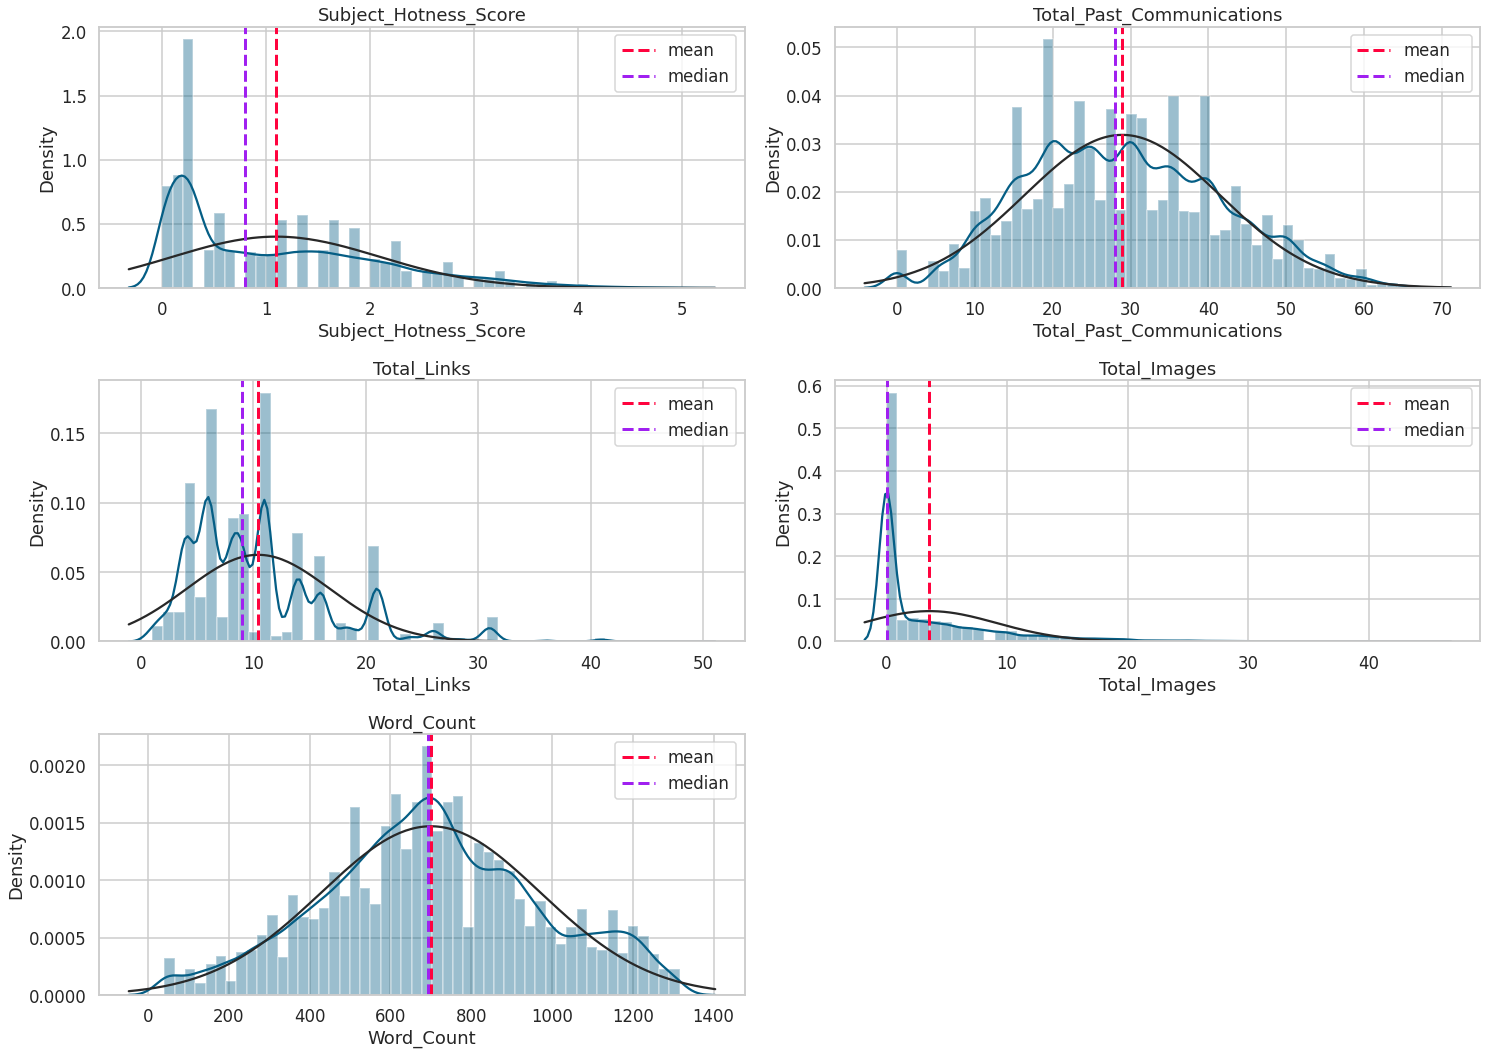

In [38]:
# Chart - 1 visualization code numerical feature
graph = plt.figure(figsize = (21,29))
for i,col in enumerate(num_feature) :
    sns.set_style("whitegrid")
    sns.set_context("talk");
    plt.subplot(6,2,i+1);
    sns.distplot(df[col], color = '#055E85', fit = norm);
    feature = df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();


##### 1. Why did you pick the specific chart?

above distpolt is a combination of both histogram and KDE plot,for plotting continous variable and understanding the distribution  it is the best.

##### 2. What is/are the insight(s) found from the chart?

 Subject hotness score, total image, and total links all displayed a positive skew, indicating that these variables tended to have more values on the higher end of the distribution. On the other hand, word count and total communication count displayed a somewhat normal distribution, with values distributed more evenly across the range.


When examining the average values of these variables, I found that,
* Toal links has an average value of 10 
* Total image has an average value of 3
* Word count has an average value of 700
* Subject hotness score has an average of value 1
* Total communication has an average of value 30



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The plot that was created to understand the distribution of each variable is an important step in building a model for an effective email campaign. 

we can gain insight into the characteristics of the data and identify any outliers or missing values that may need to be addressed.

 However, it is important to note that this plot alone is not sufficient to predict negative growth.


###Effect of Email Type 

There are two types,

Type 1 = Marketing

Type 2 = Important Notice

#### Chart - 2 Enagement Based on Email Type

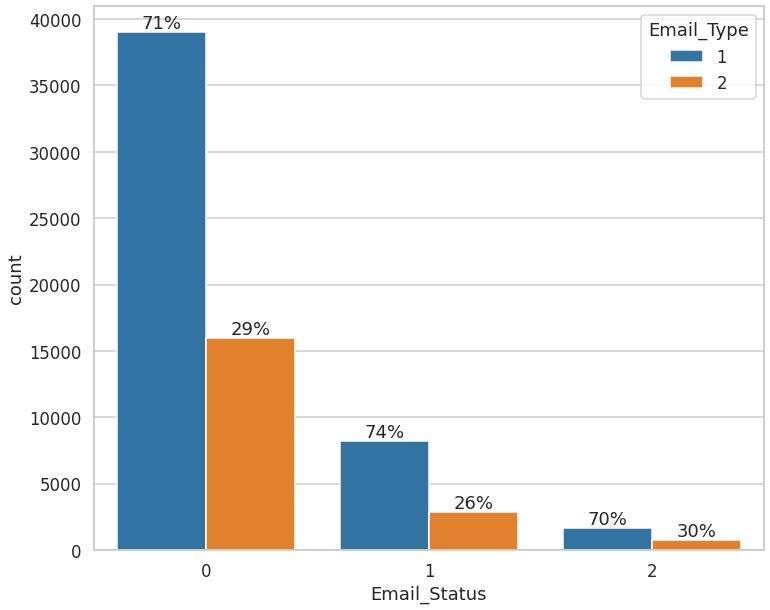

In [39]:
# Chart - 2 visualization code
plt.figure(figsize = (12,10))
ax = sns.countplot(x=df['Email_Status'], hue=df['Email_Type'])
unique = len([x for x in df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")
plt.show()

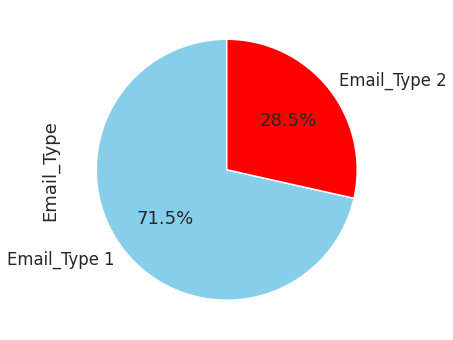

In [40]:
#pie chart for distribution of each email type
df['Email_Type'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               labels=['Email_Type 1','Email_Type 2'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              );

##### 1. Why did you pick the specific chart?

Count plot displays the frequency of each category in a bar chart format, making it easy to compare the count of individual categories. 

pie plot displays the proportion of each category in a circular chart format. Used to understand the relative size of each category in relation to the whole.

##### 2. What is/are the insight(s) found from the chart?

overall most of the emails are ignored.

there are 71% are of type 1, out of which 71% are ignored i.e., so only 29% of type 1 shows open rate.

also 29% emails are of type 2, out of which 29% percent are ignored i.e., 71% of type 2 showed open rate.

Type 2 emails were more acknowledged as compare to type-1.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot helps in understanding engagement of emails but this graph was incapable to produce any business impact other than visualizing the curiosity of engagement.

#### Chart - 3 Engagement based on Email Type with all numerical features

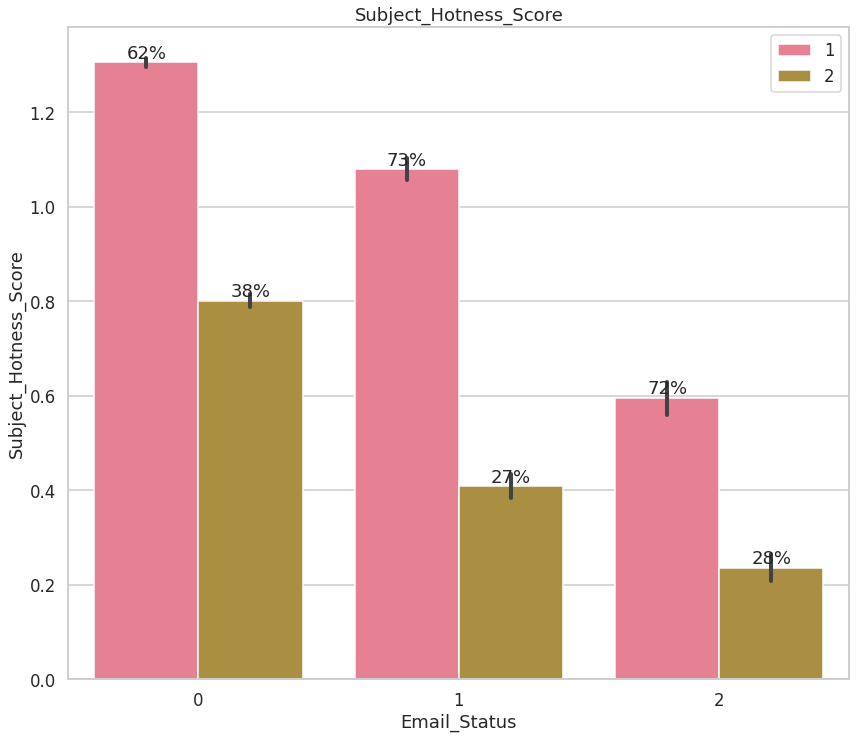

------------------------------------------------------------------------------------------------------------------------


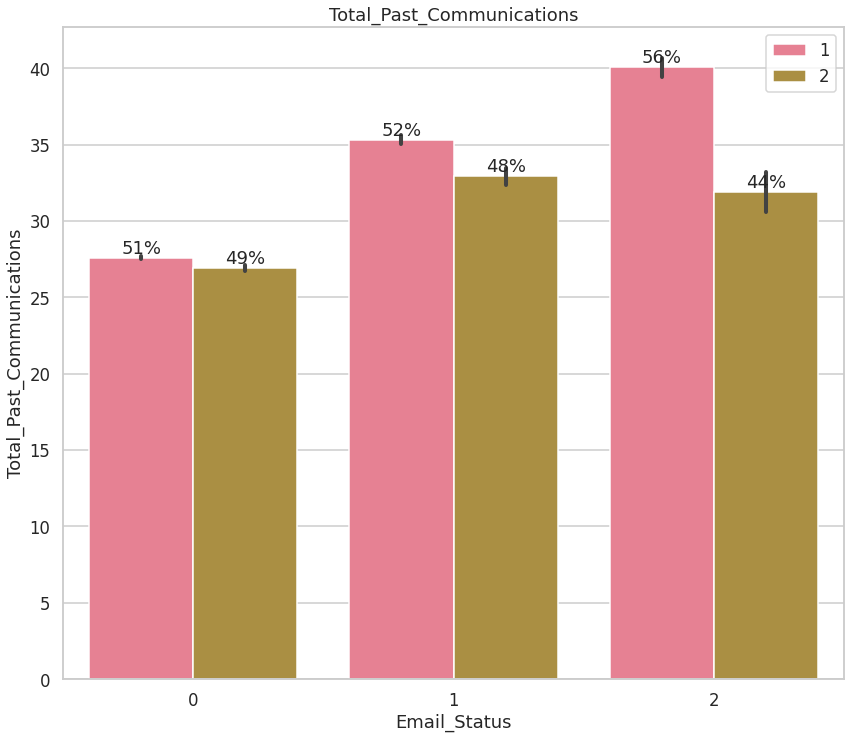

------------------------------------------------------------------------------------------------------------------------


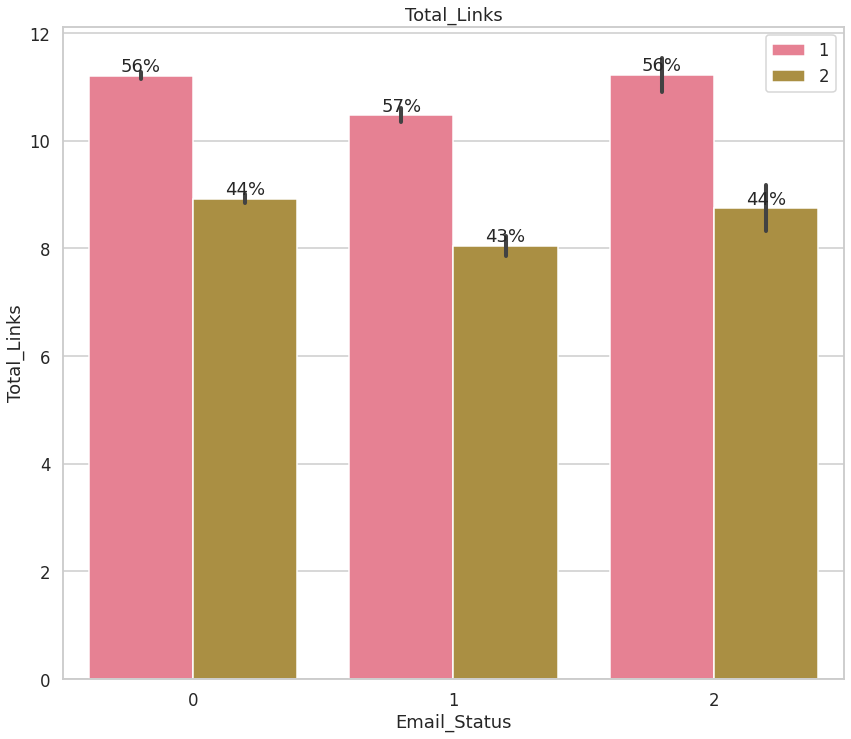

------------------------------------------------------------------------------------------------------------------------


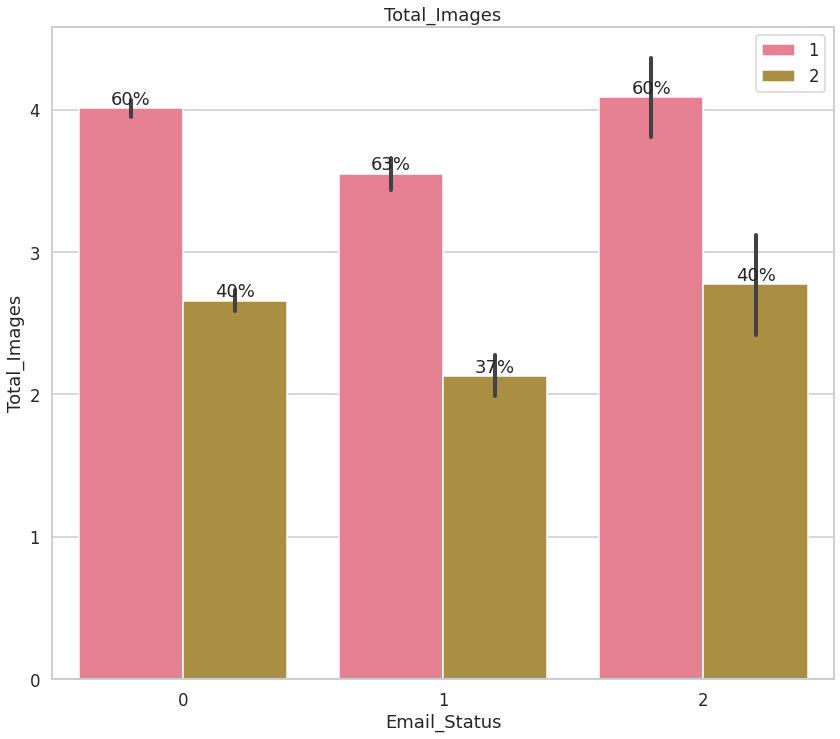

------------------------------------------------------------------------------------------------------------------------


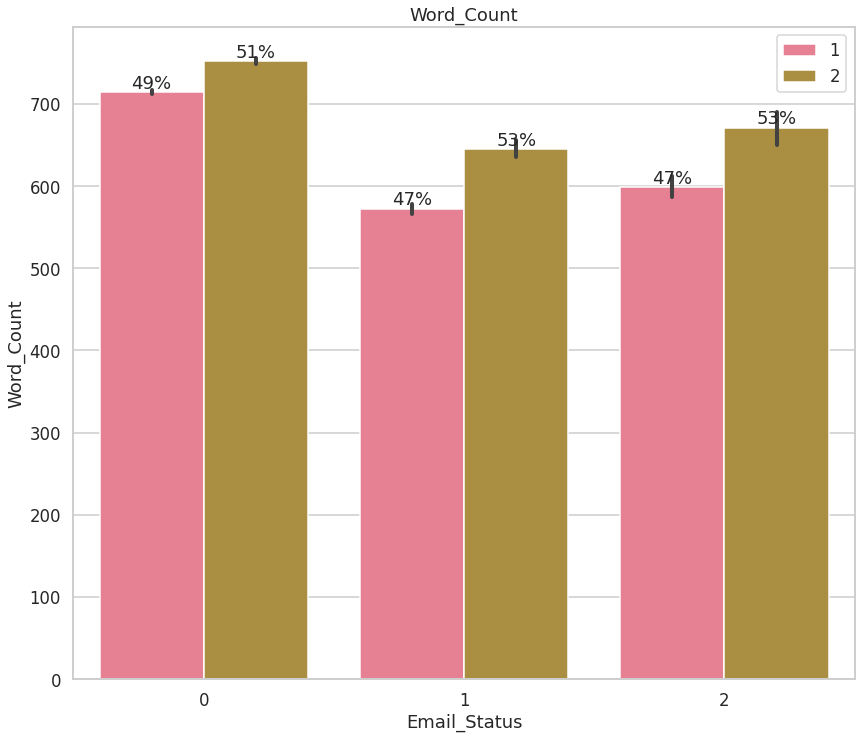

------------------------------------------------------------------------------------------------------------------------


In [41]:
## Chart - 3 visualization code

# setting the color palette and style for the plot
sns.set_palette("husl")
sns.set_style("whitegrid")

# iterating over each numerical feature in 'num_feature' list
for val in num_feature:
    # setting figure size
    plt.figure(figsize=(14, 12))
    # creating the barplot
    ax = sns.barplot(data=df, x='Email_Status', y=val, hue='Email_Type')
    # getting the number of unique categories in 'Email_Status'
    unique = len([x for x in df['Email_Status'].unique()])
    bars = ax.patches
    # iterating over each unique category
    for i in range(unique):
        catbars = bars[i:][::unique]
        # getting the total height of bars in the category
        total = sum([x.get_height() for x in catbars])
        # displaying the percentage of each bar in the category
        for bar in catbars:
            ax.text(bar.get_x() + bar.get_width() / 2.,
                    bar.get_height(),
                    f'{bar.get_height() / total:.0%}',
                    ha="center", va="bottom")
    # setting legend position
    plt.legend(bbox_to_anchor=(1.0, 1), loc='upper right')
    # setting plot title
    plt.title(val)
    # displaying the plot
    plt.show()
    # printing separator
    print('-' * 120)


##### 1. Why did you pick the specific chart?

for understanding of both discrete and continous data bar plot is usefel.

Barplot shows frequency counts of values for categorical variables, and can also display other statistics like percentages. A bar chart was used to show the average percentage of Email type with respect to Email status.

##### 2. What is/are the insight(s) found from the chart?

This graph shows that past communication plays a key role in improving email engagement, along with an average word count of 600, subject hotness score of 0.6, and 10 links and 3 images in the content. The higher the number of past communications, the better the engagement.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Marketing emails tend to be ignored more often than important notices, so it's important to prioritize two-way communication and avoid using "no-reply" email addresses. 

Additionally, marketing emails have a low click-through or conversion rate, which can negatively impact business growth and revenue if email marketing is a key strategy.

###Effect of Email Campaign Type

#### Chart - 4 Email Campaign Type

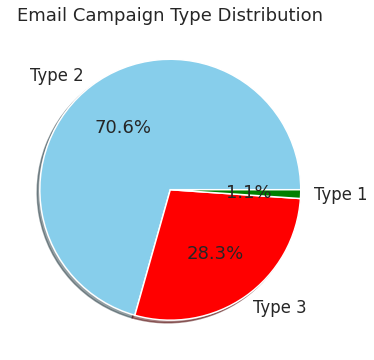

In [42]:
# Chart - 4 visualization code
# Get value counts for each Email Campaign Type
campaign_counts = df['Email_Campaign_Type'].value_counts()

# Set up pie chart figure
fig, ax = plt.subplots(figsize=(15, 6))

# Plot pie chart
ax.pie(campaign_counts, 
       labels=['Type 2','Type 3', 'Type 1'], 
       colors=['skyblue','red','green'], 
       autopct=lambda pct: f"{pct:.1f}%", 
       shadow=True)

# Add title
ax.set_title('Email Campaign Type Distribution')

# Show chart
plt.show()


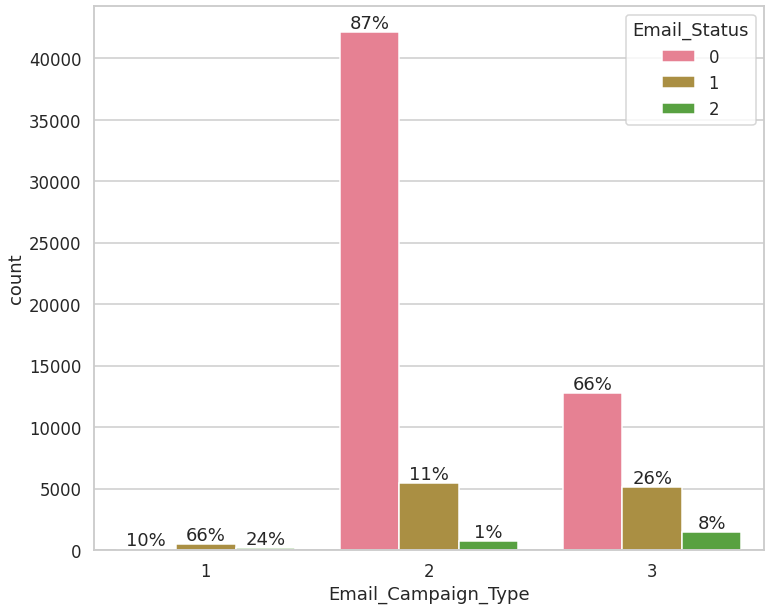

In [43]:
#bar plot for understanding how email status is affected by campign type 
plt.figure(figsize = (12,10))
ax = sns.countplot(x=df['Email_Campaign_Type'], hue=df['Email_Status'])
unique = len([x for x in df['Email_Campaign_Type'].unique()])
bars = ax.patches
for w in range(unique):
    catbars=bars[w:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

Barplot helps in understanding of both discrete and continous data data. Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of Email campaign type with respect to Email status, I have used Bar Chart.

Pie chart show the proportion of each caetgory.

##### 2. What is/are the insight(s) found from the chart?

Email campaign 1, even though has very small quantity but open rate for those email are way more than others.

Email campaign type 2 show most of the emails as ignored and only 1% of acknowledged emails.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Company should increase campaign type 1 as it show more engagement and stop campaign 2 as its most of the emails are ignored.


###Effect of Location

#### Chart - 5 Location with most Email Acknowledged

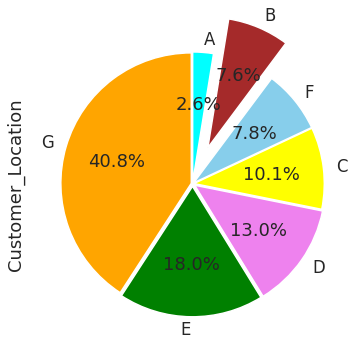

In [44]:
# Chart - 5 visualization code
#pie chart for distribution of each email campaign type
df['Customer_Location'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               labels=['G','E', 'D','C','F','B','A'],
                               colors=['orange','green','violet','yellow','skyblue','brown','cyan','red'],
                               explode=[0.01,0.02,0.02,0.01,0.01,0.3,0.01]
                              );


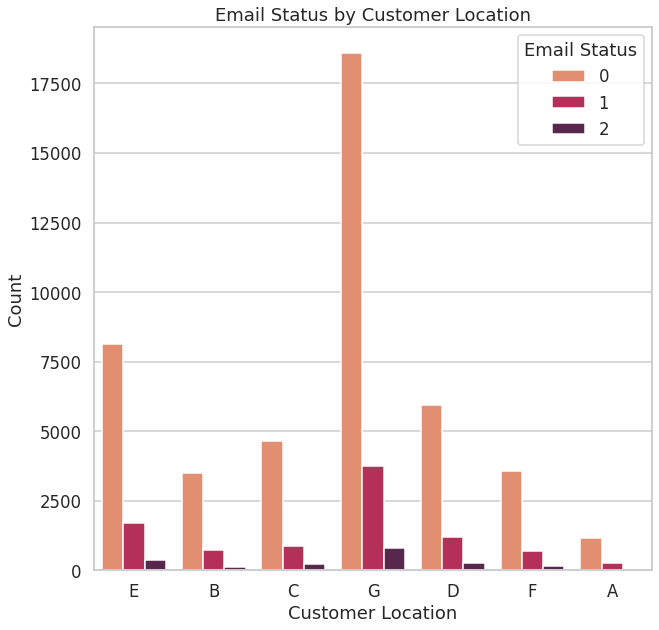

In [45]:
#based on location identifying how email status changed
plt.figure(figsize=(10,10))
sns.countplot(x=df['Customer_Location'], hue=df['Email_Status'], palette='rocket_r')
plt.legend(title='Email Status', loc='upper right')
plt.title('Email Status by Customer Location')
plt.xlabel('Customer Location')
plt.ylabel('Count')
plt.show()

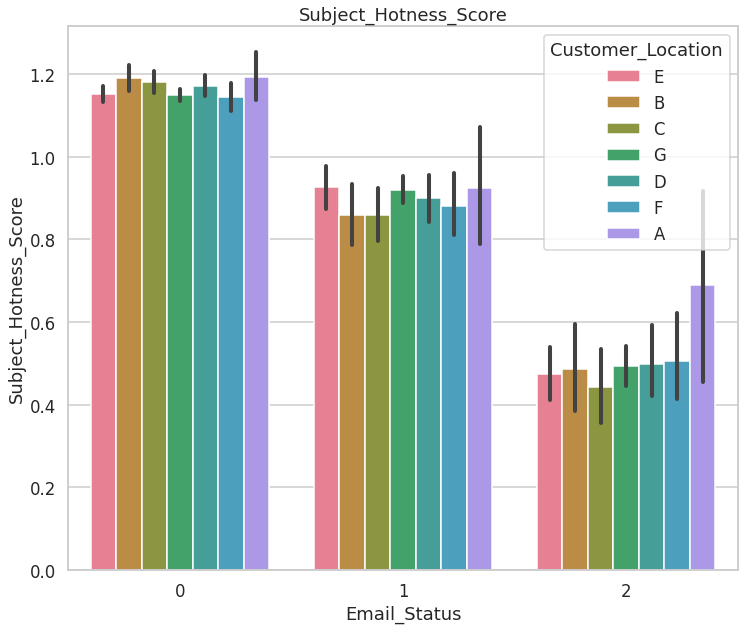

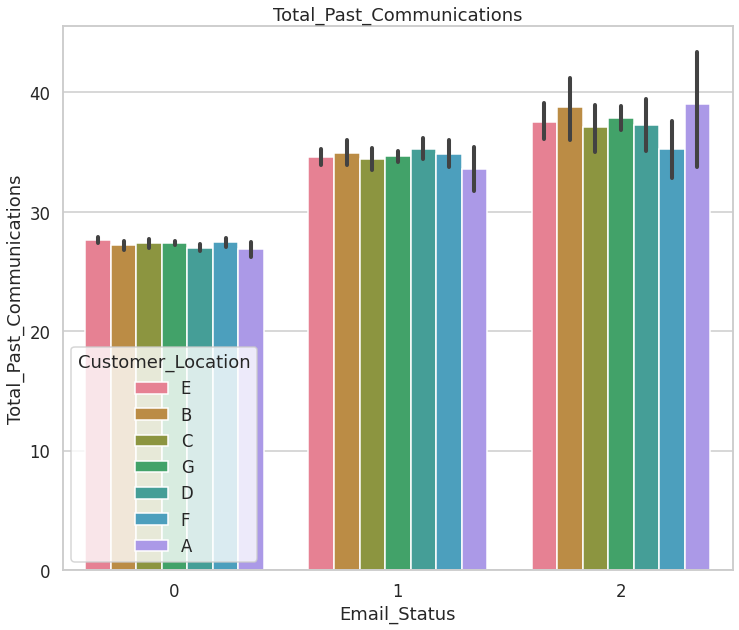

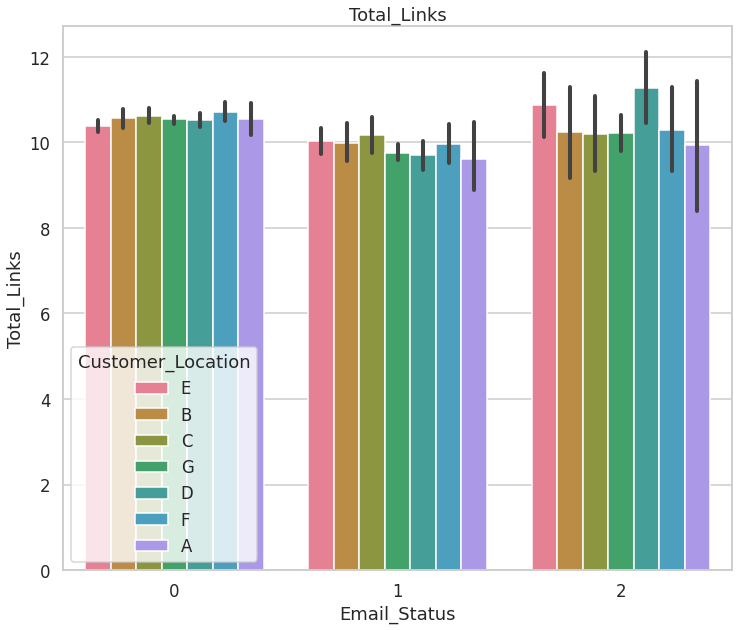

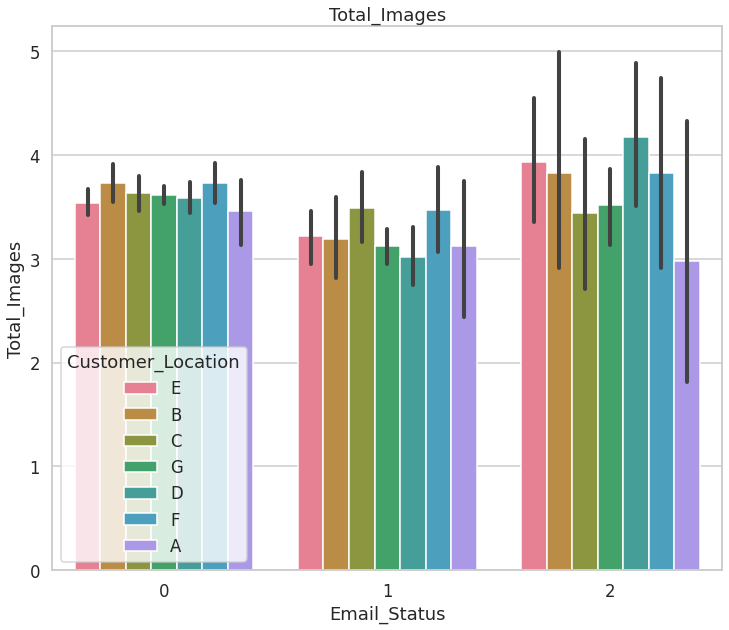

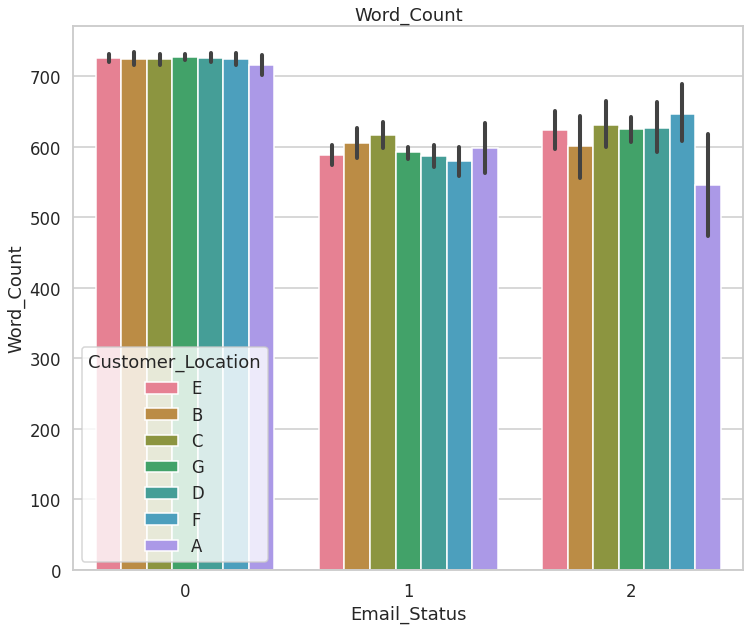

In [48]:
#checking effect of location on other numerical features
# set the color palette
palette = sns.color_palette("husl", len(df['Customer_Location'].unique()))

# loop through each numerical feature
for feature in num_feature:
    plt.figure(figsize=(12, 10))
    ax = sns.barplot(data=df, x='Email_Status', y=feature, hue='Customer_Location', palette=palette)
    plt.title(feature)
    plt.show()
    print('='*120)

##### 1. Why did you pick the specific chart?

for frequency understanding of each catgeory this plot is vet useful

##### 2. What is/are the insight(s) found from the chart?

Despite sending a relatively low number of emails to Location C, it has received the highest level of engagement with the maximum number of communications and acknowledged emails.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Sending more emails to Location C, instead of Location G where emails are ignored and acknowledged less, could improve the conversion rate and prevent potential revenue loss.

###analysis of time when email was sent

#### Chart - 6

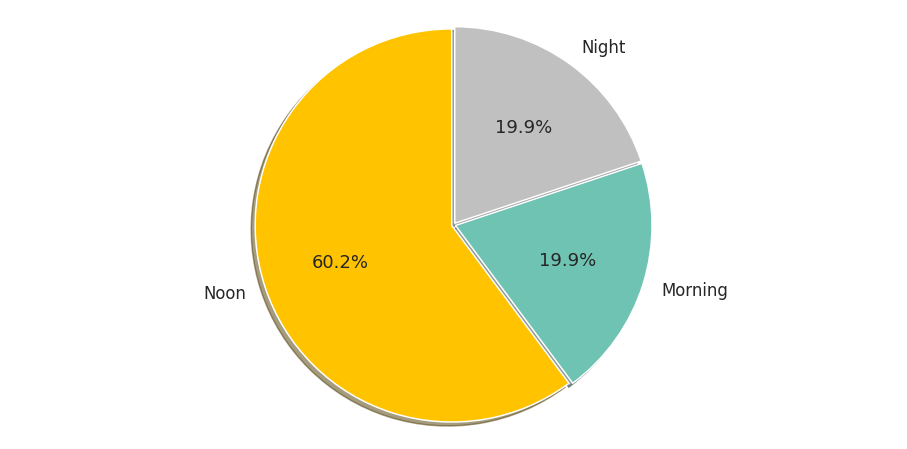

In [53]:
# Chart - 6 visualization code
#pie chart for distribution of email based on time period
sizes = df['Time_Email_sent_Category'].value_counts().values
labels = ['Noon','Morning', 'Night']
colors = ['#FFC300','#6FC3B2','#C0C0C0']
explode = [0.01,0.01,0.01]
plt.figure(figsize=(16,8))

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [54]:
plt.figure(figsize = (10,10))
ax = sns.countplot(x=df['Email_Status'], hue=df['Time_Email_sent_Category'], palette='PuBu')
unique = len([x for x in df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
  catbars=bars[i:][::unique]
#get height
total = sum([x.get_height() for x in catbars])
#print percentage
for bar in catbars:
ax.text(bar.get_x()+bar.get_width()/2.,
bar.get_height(),
f'{bar.get_height()/total:.0%}',
ha="center",va="bottom")

IndentationError: ignored

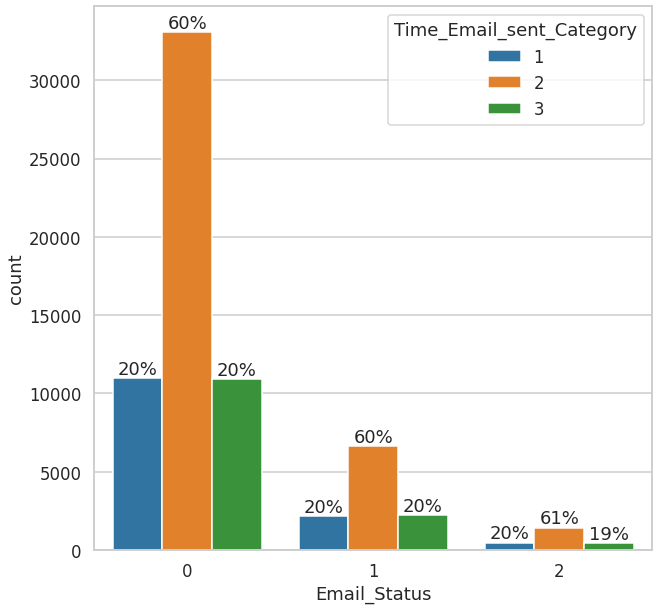

In [ ]:
#bar plot for understanding how email status is affected by Time_Email_sent
plt.figure(figsize = (10,10))
ax = sns.countplot(x=df['Email_Status'], hue=df['Time_Email_sent_Category'])
unique = len([x for x in df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

Pie chart helps in learning the distribution whereas count plot helped in understanding the effect of time period on how emails were treated.

##### 2. What is/are the insight(s) found from the chart?

60% of the emails were sent during afternoon, out which 60% is being ignored i.e., for the remaining 40% only 60% showed opened rate.

Since email sent in morning and night has equal percentage, overal email sent during these time are more acknowledged.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Sending emails at the right time plays very important role, people tends to plan their day during morning or plan for tommorrow in night time, therefore these time show more acknowledged emails. Sending emails exactly when customer prefer to see the content or advertisement thus show more impression or improve conversion rate.

Email sent during afternoon time showed maximum number or emails ignored which can be costly as email acknowledged during this time is very less.

### Chart - 7 Total Past Communication

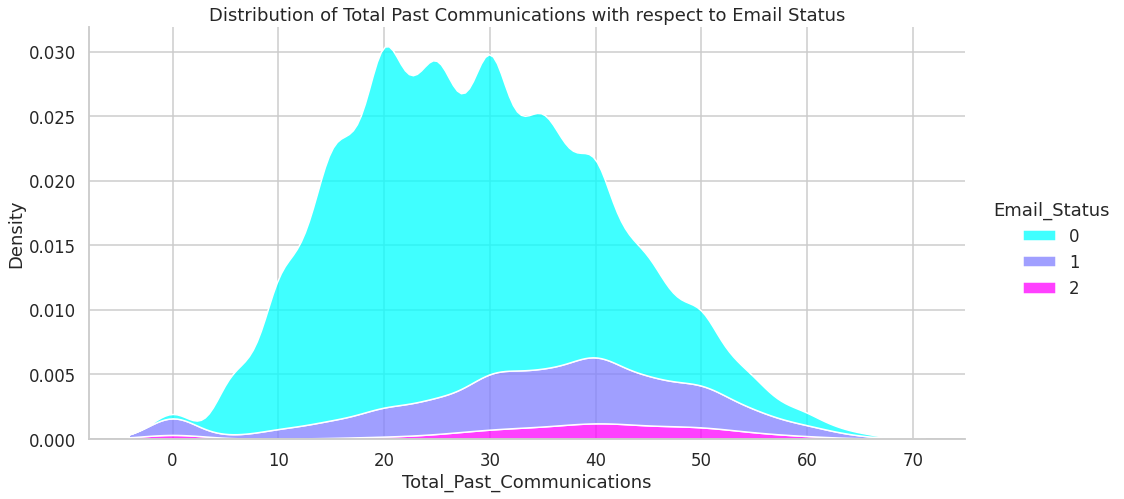

In [ ]:
# Chart - 7 visualization code
ax = sns.displot(x='Total_Past_Communications', hue = 'Email_Status', data = df, 
            kind = 'kde', height=7, aspect=2, multiple='stack', palette='cool');

plt.title('Distribution of Total Past Communications with respect to Email Status');
plt.xlabel('Total_Past_Communications');
plt.show()

##### 1. Why did you pick the specific chart?

Stacked chart helps in comparing the probability density functions of multiple features.

##### 2. What is/are the insight(s) found from the chart?

Based on the density it can be easily visible that for large number of ignored emails, it shows less number of communication than that of acknowledged emails.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is very important to communicate with customer rather than just sending them marketing email.

Since this is a density plot, it only shows distribution but not enough to produce impact on business.

### Chart - 8 - Correlation Heatmap

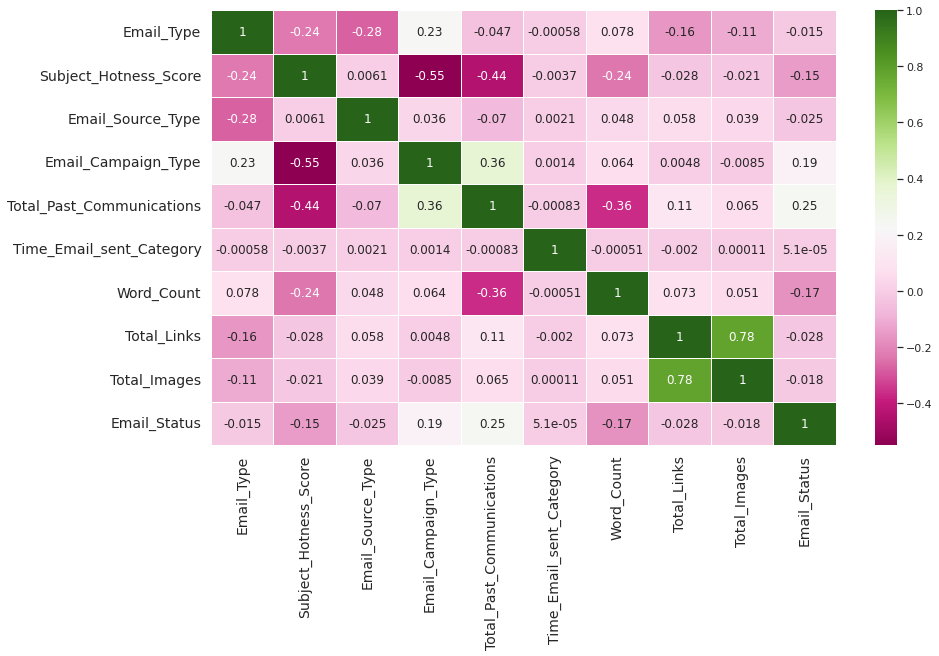

In [ ]:
# Correlation Heatmap visualization code
sns.set_context('notebook')
plt.figure(figsize = (14,8))
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
sns.heatmap(df.corr(), annot=True,linewidth=.5,cmap="PiYG");

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Total links and image show correaltion of 0.78 which causes multicollinearity. 

### Chart - 9 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, hue="Email_Status");

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know, there are less linear relationship between variables and since most of them were categorial data with one or two category, it does not show much relationship.

Total links and total image show some linear relation and we already know they are correlated as seen in earlier heatmap.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***